In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

# Set visualization style
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
# Load the dataset
df = pd.read_csv('breast-cancer.csv')

# Drop id column as it's not a feature
df = df.drop('id', axis=1)

# Display basic information
print('Dataset Info:')
print(df.info())
print('\nMissing Values:')
print(df.isnull().sum())

# Encode target variable (diagnosis: M=1, B=0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Standardize numerical features
scaler = StandardScaler()
feature_cols = df.columns.drop('diagnosis')
df[feature_cols] = scaler.fit_transform(df[feature_cols])

# Save cleaned dataset
df.to_csv('Breast_Cancer_Cleaned.csv', index=False)
print('\nCleaned Dataset Info:')
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se     

Summary Statistics:
        diagnosis   radius_mean  texture_mean  perimeter_mean     area_mean  \
count  569.000000  5.690000e+02  5.690000e+02    5.690000e+02  5.690000e+02   
mean     0.372583 -1.373633e-16  6.868164e-17   -1.248757e-16 -2.185325e-16   
std      0.483918  1.000880e+00  1.000880e+00    1.000880e+00  1.000880e+00   
min      0.000000 -2.029648e+00 -2.229249e+00   -1.984504e+00 -1.454443e+00   
25%      0.000000 -6.893853e-01 -7.259631e-01   -6.919555e-01 -6.671955e-01   
50%      0.000000 -2.150816e-01 -1.046362e-01   -2.359800e-01 -2.951869e-01   
75%      1.000000  4.693926e-01  5.841756e-01    4.996769e-01  3.635073e-01   
max      1.000000  3.971288e+00  4.651889e+00    3.976130e+00  5.250529e+00   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count     5.690000e+02      5.690000e+02    5.690000e+02         5.690000e+02   
mean     -8.366672e-16      1.873136e-16    4.995028e-17        -4.995028e-17   
std       1.000880e+00   

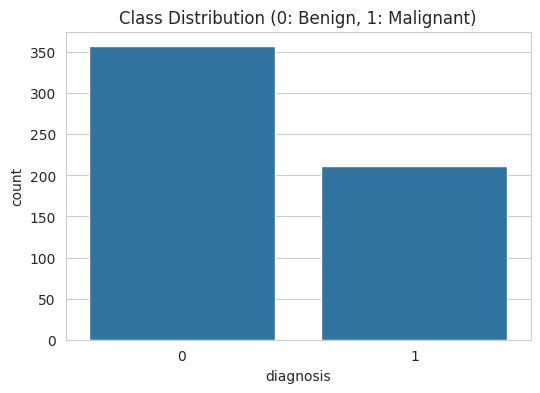

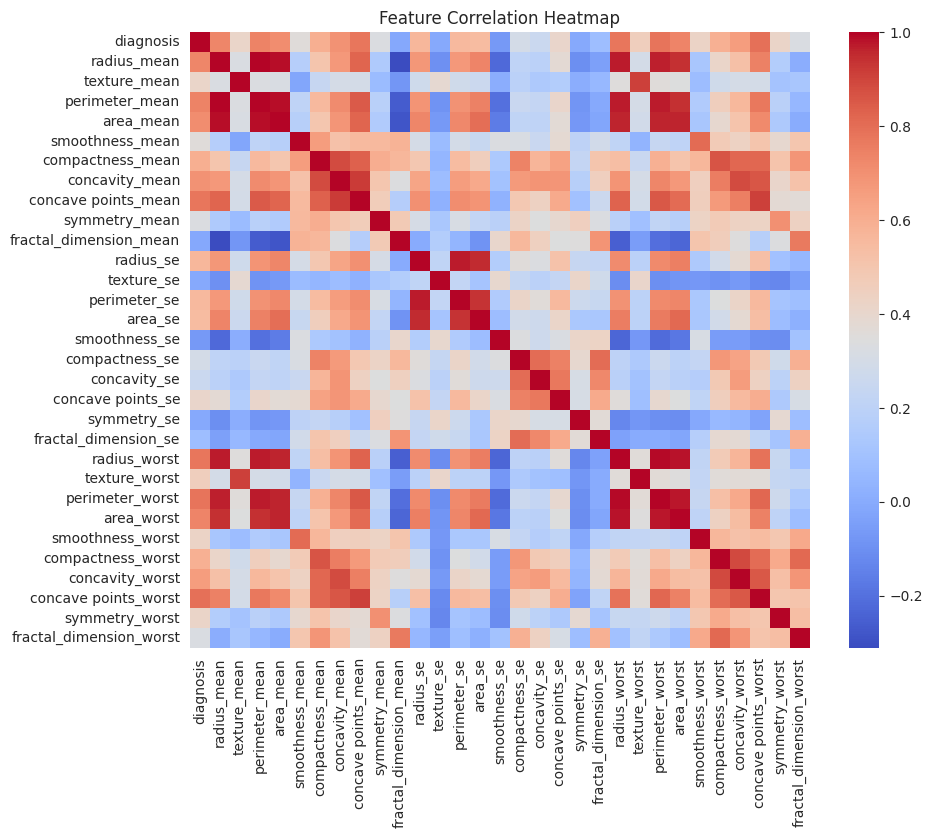

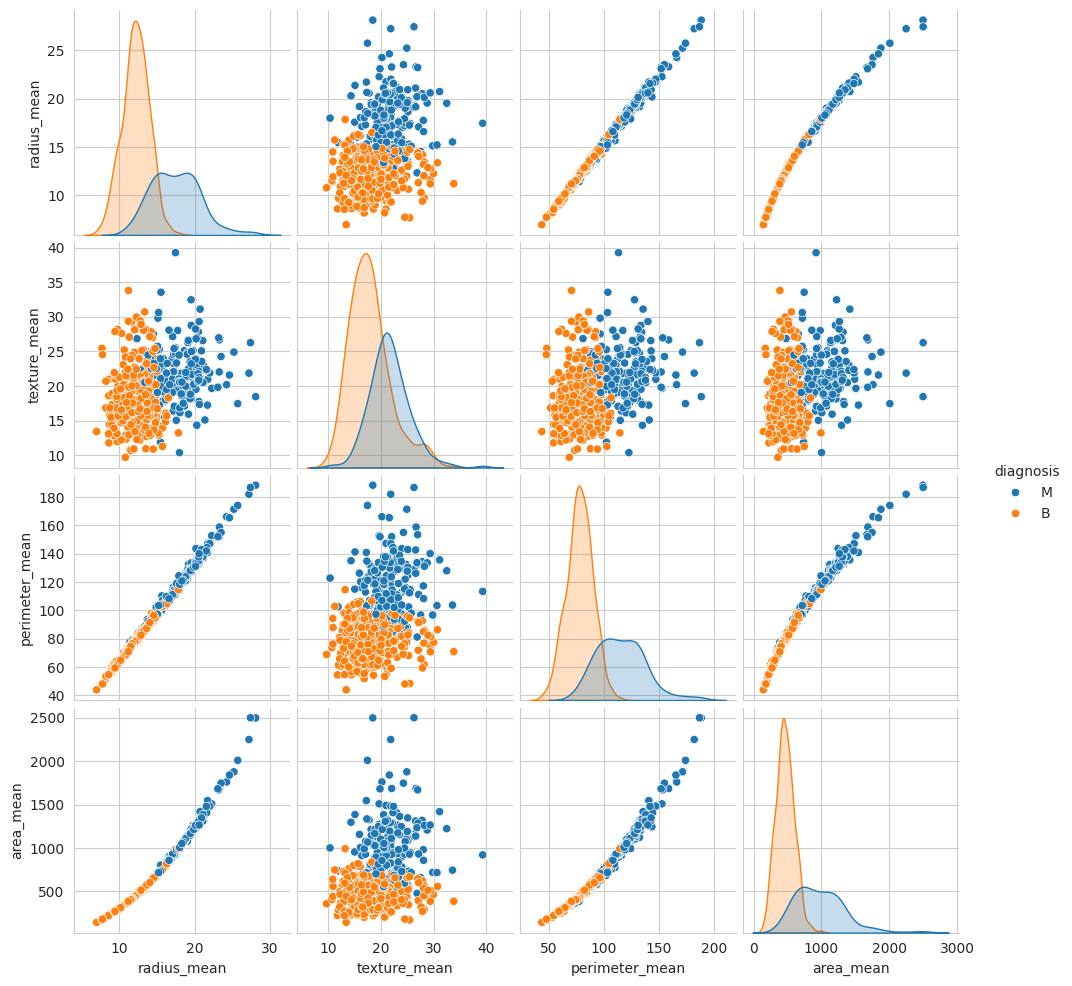

In [4]:
# Summary statistics
print('Summary Statistics:')
print(df.describe())

# Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df)
plt.title('Class Distribution (0: Benign, 1: Malignant)')
plt.savefig('class_distribution.png')
plt.show()

# Correlation heatmap for top features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()

# Pairplot for top 4 features (use original data for visualization)
df_original = pd.read_csv('breast-cancer.csv')
sns.pairplot(df_original[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']], hue='diagnosis')
plt.savefig('pairplot.png')
plt.show()


Training SVM with linear kernel...
Best parameters for linear kernel: {'C': 0.1}
Best cross-validation accuracy: 0.9758
Test accuracy for linear kernel: 0.9825


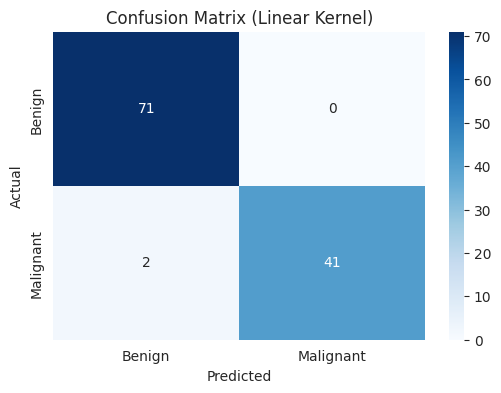


Classification Report (Linear Kernel):
              precision    recall  f1-score   support

      Benign       0.97      1.00      0.99        71
   Malignant       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Training SVM with rbf kernel...
Best parameters for rbf kernel: {'C': 1, 'gamma': 'scale'}
Best cross-validation accuracy: 0.9736
Test accuracy for rbf kernel: 0.9737


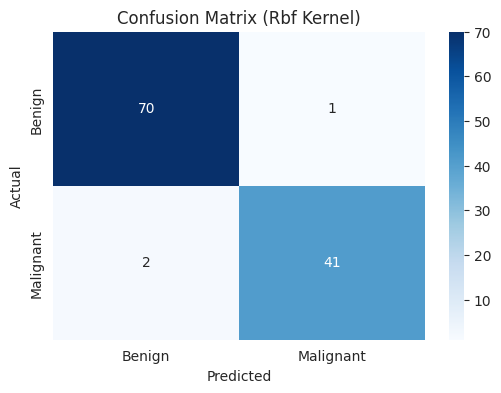


Classification Report (Rbf Kernel):
              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98        71
   Malignant       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [5]:
# Prepare data
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for linear and RBF kernels
param_grid = {
    'linear': {'C': [0.1, 1, 10, 100]},
    'rbf': {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto', 0.001, 0.01, 0.1]}
}

# Train and evaluate SVM models
best_models = {}
for kernel in ['linear', 'rbf']:
    print(f'\nTraining SVM with {kernel} kernel...')
    grid = GridSearchCV(SVC(kernel=kernel), param_grid[kernel], cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    best_models[kernel] = grid.best_estimator_
    print(f'Best parameters for {kernel} kernel: {grid.best_params_}')
    print(f'Best cross-validation accuracy: {grid.best_score_:.4f}')

    # Evaluate on test set
    y_pred = best_models[kernel].predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Test accuracy for {kernel} kernel: {accuracy:.4f}')

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.title(f'Confusion Matrix ({kernel.capitalize()} Kernel)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig(f'confusion_matrix_{kernel}.png')
    plt.show()

    # Classification report
    print(f'\nClassification Report ({kernel.capitalize()} Kernel):')
    print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

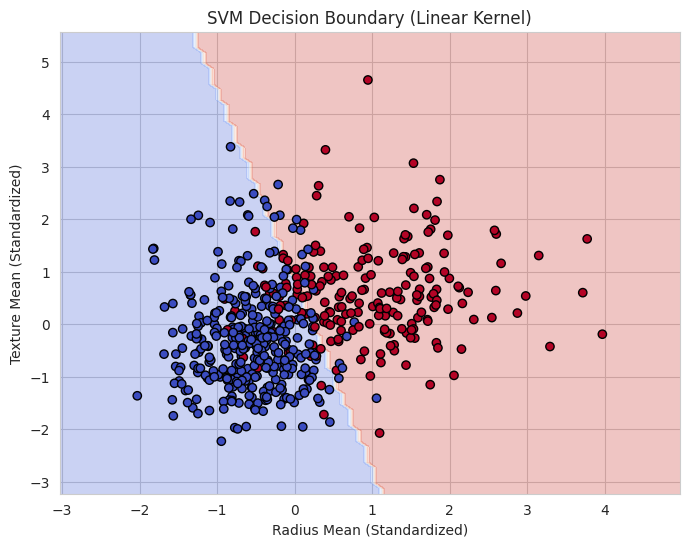

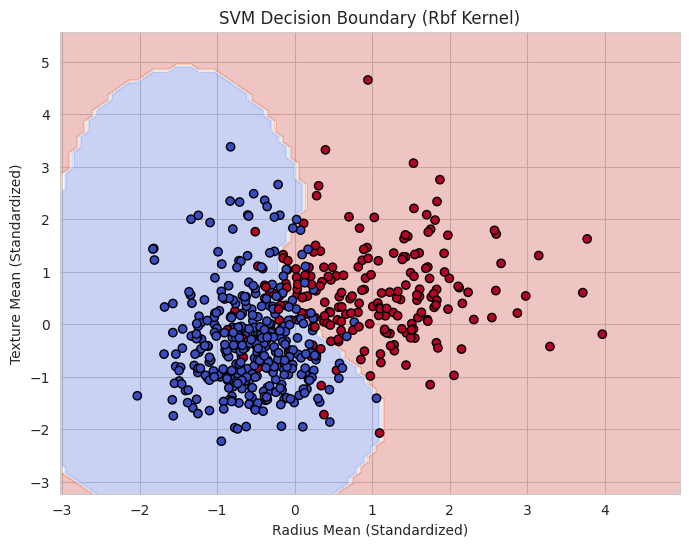

In [6]:
# Visualize decision boundaries using two features (radius_mean, texture_mean)
X_2d = X[['radius_mean', 'texture_mean']]
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y, test_size=0.2, random_state=42)

# Train SVM models on 2D data
for kernel in ['linear', 'rbf']:
    svm_2d = SVC(kernel=kernel, **grid.best_params_)
    svm_2d.fit(X_train_2d, y_train_2d)

    # Create mesh grid for decision boundary
    x_min, x_max = X_2d['radius_mean'].min() - 1, X_2d['radius_mean'].max() + 1
    y_min, y_max = X_2d['texture_mean'].min() - 1, X_2d['texture_mean'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Predict on mesh grid
    Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X_2d['radius_mean'], X_2d['texture_mean'], c=y, edgecolors='k', cmap='coolwarm')
    plt.xlabel('Radius Mean (Standardized)')
    plt.ylabel('Texture Mean (Standardized)')
    plt.title(f'SVM Decision Boundary ({kernel.capitalize()} Kernel)')
    plt.savefig(f'decision_boundary_{kernel}.png')
    plt.show()